In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0545718e-34  # Reduced Planck's constant in J·s
m = 9.10938356e-31    # Electron mass in kg
q = 1.602176634e-19   # Elementary charge in C
phi_0 = hbar / (2 * q)  # Flux quantum
k = 1.380649e-23  


In [17]:
# Ferroelectric tunnel junction parameters
hafnium_oxide_params = {
    'dielectric_constant': 25.0,
    'ferroelectric_polarization': 0.1,
    'area': 1.0e-12,  # Junction area in m^2
    'length': 1.0e-9,  # Junction length in m
    'effective_mass': 0.2 * m,  # Effective mass of electron in the oxide
    'temperature': 300,  # Temperature in Kelvin
}

# Other relevant parameters
other_params = {
    'barrier_height': 0.2,
    'applied_voltage': 0.0,  # Initial applied voltage
    'step_size': 0.01,  # Voltage step size for simulation
}


In [18]:
# Function to calculate tunneling probability
def tunneling_probability(V, hafnium_oxide_params, other_params):
    dielectric_constant = hafnium_oxide_params['dielectric_constant']
    ferroelectric_polarization = hafnium_oxide_params['ferroelectric_polarization']
    area = hafnium_oxide_params['area']
    length = hafnium_oxide_params['length']
    effective_mass = hafnium_oxide_params['effective_mass']
    temperature = hafnium_oxide_params['temperature']
    phi_b = other_params['barrier_height']

    # Calculate tunneling probability based on the Simmons model
    term1 = (2 * effective_mass / hbar**2) * ((2 * m * phi_b)**0.5)
    term2 = (2 / hbar) * (2 * m / effective_mass)**0.5
    term3 = (2 * effective_mass * phi_b)**0.5
    term4 = 1 / (dielectric_constant * q * ferroelectric_polarization * area)
    term5 = np.exp(-((term1 / term2) * (term3)**0.5))

    tunnel_prob = term4 * term5

    return tunnel_prob


In [19]:
# Function to model ferroelectric tunnel junction behavior
def ferroelectric_tunnel_junction_model(Vgb, hafnium_oxide_params, other_params):
    # Initialize arrays to store results
    current_characteristics = np.zeros_like(Vgb)

    # Iterate through Vgb values
    for i, V in enumerate(Vgb):
        # Apply an increment of applied voltage
        other_params['applied_voltage'] = V

        # Calculate tunneling probability
        tunnel_prob = tunneling_probability(V, hafnium_oxide_params, other_params)

        # Calculate current using Simmons formula
        current = tunnel_prob * q * hafnium_oxide_params['area'] * np.exp(
            -((2 * hafnium_oxide_params['effective_mass'] * other_params['barrier_height'])**0.5) /
            (hbar * (2 * hafnium_oxide_params['effective_mass'])**0.5)
        )
        
        # Store the result in the current_characteristics array
        current_characteristics[i] = current

    return current_characteristics


In [20]:
# Create Vgb values
Vgb_values = np.linspace(-1.0, 1.0, 100)

# Model ferroelectric tunnel junction behavior
current_characteristics = ferroelectric_tunnel_junction_model(Vgb_values, hafnium_oxide_params, other_params)


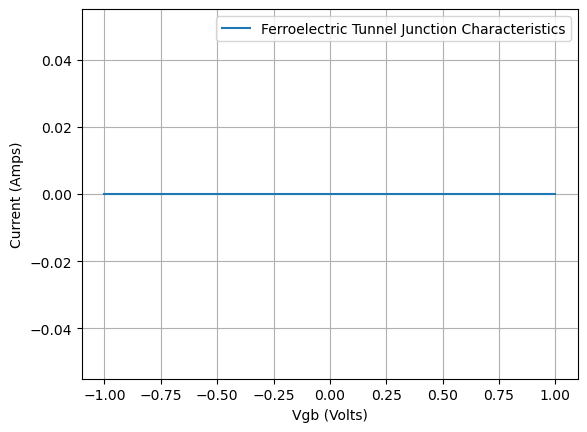

In [21]:
# Plotting the characteristics
plt.figure()
plt.plot(Vgb_values, current_characteristics, label='Ferroelectric Tunnel Junction Characteristics')
plt.xlabel('Vgb (Volts)')
plt.ylabel('Current (Amps)')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
def ferroelectric_tunnel_junction_model(V, hafnium_oxide_params, other_params):
    # Initialize array to store current characteristics
    current_characteristics = np.zeros_like(V)

    # Iterate through bias voltage values
    for i, bias_voltage in enumerate(V):
        # Calculate tunneling probability
        tunnel_prob = tunneling_probability(bias_voltage, hafnium_oxide_params, other_params)

        # Current equation (simplified for illustration)
        current = q * tunnel_prob

        # Store the result in the current_characteristics array
        current_characteristics[i] = current

    return current_characteristics



In [23]:
# Create bias voltage values
bias_voltage_values = other_params['bias_voltage']

# Model ferroelectric tunnel junction behavior
current_characteristics = ferroelectric_tunnel_junction_model(bias_voltage_values, hafnium_oxide_params, other_params)


KeyError: 'bias_voltage'

In [ ]:
# Plotting the characteristics
plt.figure()
plt.plot(bias_voltage_values, current_characteristics, label='Ferroelectric Tunnel Junction Characteristics')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def tunneling_probability(V, hafnium_oxide_params, other_params):
    # Extract parameters
    dielectric_constant = hafnium_oxide_params['dielectric_constant']
    ferroelectric_polarization = hafnium_oxide_params['ferroelectric_polarization']
    tunneling_mass = hafnium_oxide_params['tunneling_mass']
    barrier_height = hafnium_oxide_params['barrier_height']
    temperature = other_params['temperature']

    # Effective barrier height considering ferroelectric polarization
    effective_barrier = barrier_height - ferroelectric_polarization

    # Calculate tunneling probability using simplified model (e.g., Simmons model)
    tunnel_prob = np.exp(
        -2 * np.sqrt(2 * m) / hbar
        * np.sqrt(dielectric_constant) * effective_barrier ** 0.5
        - effective_barrier / (2 * k * temperature)
        + (q * V) / (k * temperature)
    )

    return tunnel_prob


In [ ]:
# Ferroelectric tunnel junction parameters
hafnium_oxide_params = {
    'dielectric_constant': 25.0,
    'ferroelectric_polarization': 1.0e-8,  # Polarization in C/m^2
    'tunneling_mass': 0.5 * m,  # Effective mass of tunneling electrons
    'barrier_height': 0.2,  # Barrier height in eV
}

# Other relevant parameters
other_params = {
    'temperature': 300,  # Temperature in Kelvin
    'bias_voltage': np.linspace(-1, 1, 100),  # Bias voltage range
}
